In [1]:
import pandas as pd

data = pd.read_csv('dataseter.csv')

data.head()

C:\Users\tommy\AppData\Local\Temp\ipykernel_19884\2622821616.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


In [2]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() #so that SVM can function properly
for column in ['GENDER', 'SMOKING', 'CHRONIC_DISEASE', 'WHEEZING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY','LUNG_CANCER']:
    data[column] = label_encoder.fit_transform(data[column])

features = ['AGE','SMOKING', 'CHRONIC_DISEASE', 'GENDER', 'WHEEZING', 'COUGHING', 'SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY']

y = data['LUNG_CANCER']

X = data[features]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 25% used for testing   

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

model = svm.SVC(kernel='linear', random_state=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.51


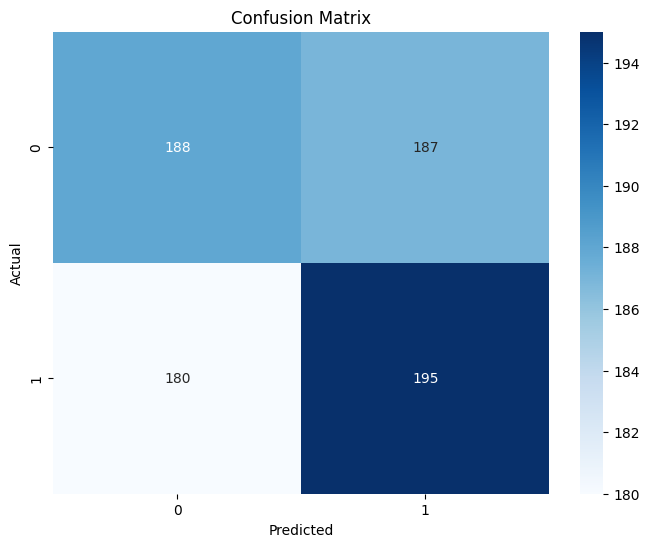

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()